In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("student_performance_dataset.csv")

In [43]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [45]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [46]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


### Lets check the columns for null values

In [47]:
null_count = df.isnull().sum()
null_count

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

# Lets convert the categorical data to numerical feautures using encoding

In [48]:
# Extracurricular Activities is Object datatype so we will convert it into string

df['Extracurricular Activities'] = df['Extracurricular Activities'].astype(str)

In [49]:
# We will use 1 for "Yes" and 0 for "No"

df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [50]:
df["Extracurricular Activities"]

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int64


## Standardization

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ["Hours Studied","Previous Scores", "Sleep Hours","Sample Question Papers Practiced"]

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df_scaled[numeric_cols].head())

   Hours Studied  Previous Scores  Sleep Hours  \
0       0.775188         1.704176     1.456205   
1      -0.383481         0.723913    -1.492294   
2       1.161410        -1.063626     0.276805   
3       0.002742        -1.005963    -0.902594   
4       0.775188         0.320275     0.866505   

   Sample Question Papers Practiced  
0                         -1.249754  
1                         -0.900982  
2                         -0.900982  
3                         -0.900982  
4                          0.145333  


## Outliers Visualization using Box Plots

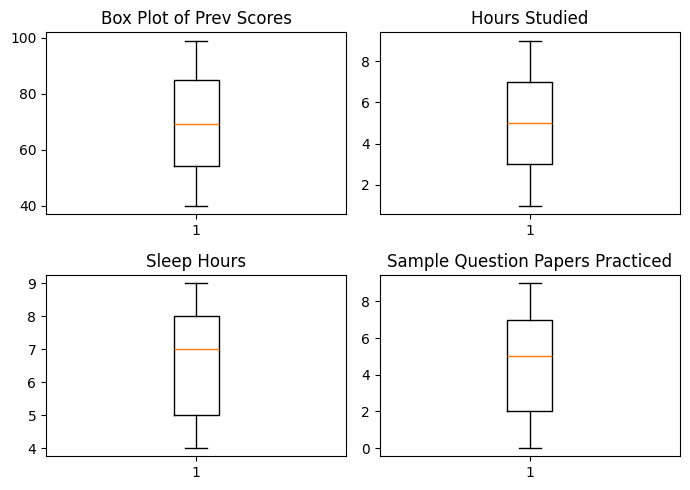

In [52]:
plt.figure(figsize=(7, 5))   
plt.subplot(2,2,1)
plt.boxplot(df['Previous Scores'].dropna())
plt.title('Box Plot of Prev Scores')

plt.subplot(2,2,2)
plt.boxplot(df['Hours Studied'].dropna())
plt.title('Hours Studied')

plt.subplot(2,2,3)
plt.boxplot(df['Sleep Hours'].dropna())
plt.title('Sleep Hours')

plt.subplot(2,2,4)
plt.boxplot(df['Sample Question Papers Practiced'].dropna())
plt.title('Sample Question Papers Practiced')

plt.tight_layout()
plt.show()


## No Outliers Found

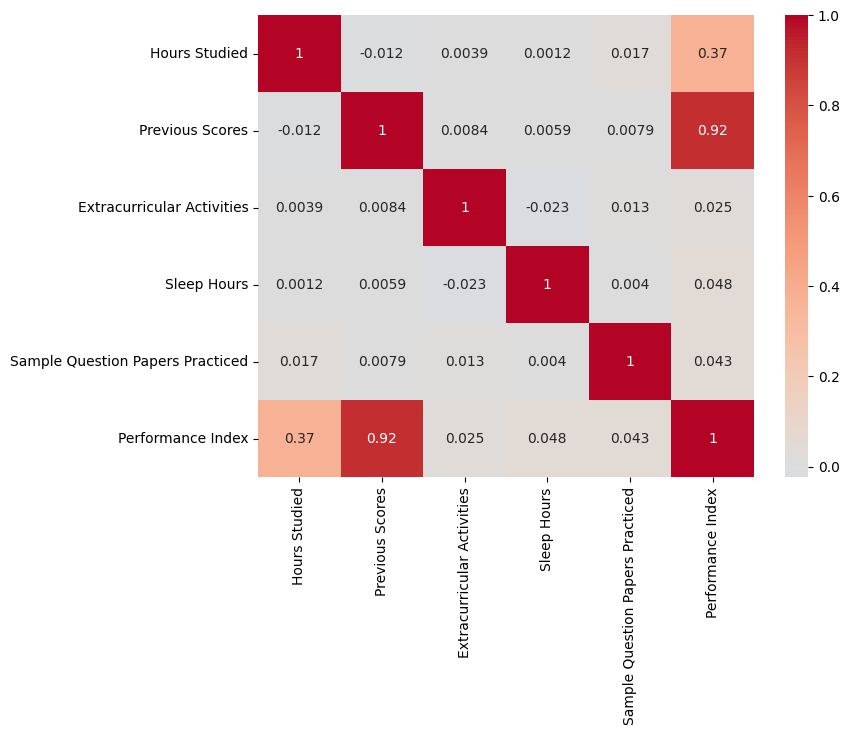

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()


# Simple Linear Regression

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



x = df[["Previous Scores"]]
y = df["Performance Index"]
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train,Y_train)

y_pred = simple_linear_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Report:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Regression Report:
Mean Absolute Error (MAE): 6.528589451840961
Mean Squared Error (MSE): 58.670594387484655
Root Mean Squared Error (RMSE): 7.659673255921865
R² Score: 0.8407592881001957


## Simple Linear model performs pretty good

# Multiple Linear Regression

In [55]:
x = df.drop("Performance Index",axis=1)
y = df["Performance Index"]
X_train , x_test , Y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)

LinearRegression()

In [56]:
y_pred = linear_model.predict(x_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Report:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Regression Report:
Mean Absolute Error (MAE): 1.5975792091646108
Mean Squared Error (MSE): 4.032544215419116
Root Mean Squared Error (RMSE): 2.008119571992444
R² Score: 0.9890550757439104


## Multiple Linear Regression model performs better